## Importación librerias

In [56]:

import pandas as pd
import numpy as np


import reverse_geocoder as rg
import pycountry



from IPython.display import display 





## Comprobación entorno
Terminal, Kernel y notebook mismo entorno


In [57]:
import sys, os
print(sys.executable)          
print(os.environ.get("VIRTUAL_ENV"))  


c:\Users\Propietario\Desktop\PROYECTO PYTHON FOR DATA\PROYECTO_EDA_PYTHON\.venv\Scripts\python.exe
C:\Users\Propietario\desktop\PROYECTO PYTHON FOR DATA\PROYECTO_EDA_PYTHON\.venv


##  1er. Dataset . Carga de datos. Información

In [58]:
df_customer = pd.read_excel("../Data/Raw/customer-details.xlsx")

Uno todas las hojas del Excell

In [59]:
df_customer = pd.concat(
    pd.read_excel("../Data/Raw/customer-details.xlsx", sheet_name=None).values(),
    ignore_index=True
)


In [60]:
df_customer. sample(10)

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
17703,17703,174983,0,0,2012-09-20,5,17f5f1fd-da34-4225-aeb8-4ca015490932
26698,6583,52071,2,1,2013-03-21,15,5e1928c3-a1dc-43fc-abf0-b3ae3db9b016
40993,11913,72687,2,1,2014-06-08,29,9dd63266-c257-44b4-a411-5b5cc311b363
37446,8366,57637,2,2,2014-07-06,10,8e5420e2-182d-47bd-96f1-bec8d670c5e7
40702,11622,133256,2,1,2014-11-17,28,499a1535-dc1c-4989-a82d-565dcfa87908
34472,5392,145119,0,1,2014-02-01,3,158b2ee5-1d3a-4f08-b35b-427ec26fcdb6
18732,18732,167536,0,1,2012-06-18,13,e803f30b-daf0-4ebc-b57b-dee908097389
30972,1892,171147,2,0,2014-06-02,3,293777c2-0480-4f54-9991-c48b5b3c051d
11061,11061,104221,0,1,2012-06-02,14,3cae6379-4b46-425e-b749-3ac77a48f447
29076,8961,65516,0,2,2013-10-01,26,ed489dce-7ccf-46ad-a0d4-bb71c566fa40


In [61]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         43170 non-null  int64         
 1   Income             43170 non-null  int64         
 2   Kidhome            43170 non-null  int64         
 3   Teenhome           43170 non-null  int64         
 4   Dt_Customer        43170 non-null  datetime64[ns]
 5   NumWebVisitsMonth  43170 non-null  int64         
 6   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.3+ MB


# Columnas e información

0. Unnamed: 0 (int64)

No es una variable útil: se puede eliminar.

1. Income (int64)

Ingresos de la persona/cliente: análisis socioeconómico

2. Kidhome (int64)

Número de hijos pequeños en el hogar: variable numérica

3. Teenhome (int64)

Número de adolescentes en el hogar: variable numérica

4. Dt_Customer (datetime64[ns])

Fecha en la que el cliente se unió / fue registrado: antiguedad.

5. NumWebVisitsMonth (int64)

Número de visitas web al mes: comportamiento online.

6. ID (object)

Identificador único del cliente: clave primaria.

# * Pasos limpieza y transformación

1.	Eliminar Unnamed: 0.

2.	Revisar duplicados en ID.

3.	Distribución de Income: outliers, clientes con ingresos extremos.

4.	Distribución de Kidhome y Teenhome: hogares sin hijos, con hijos, etc.

5.	Antigüedad del cliente: calcular diferencia entre fecha actual y Dt_Customer.

6.	NumWebVisitsMonth: nº visitas.


# 1. Eliminar Unnamed

1. Ver todas las columnas
2. Quito cualquier columna que empiece por Unnamed
3. Confirmo resultado


In [62]:

print(df_customer.columns)

df_customer = df_customer.loc[:, ~df_customer.columns.str.contains('^Unnamed')]

print(df_customer.columns)



Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'NumWebVisitsMonth', 'ID'],
      dtype='object')
Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth',
       'ID'],
      dtype='object')


# 2. Revisar duplicados de id

1. Nº de IDs totales
2. Nº de IDs únicos
3. Nº de duplicados

In [63]:
total_ids = df_customer['ID'].shape[0]

unique_ids = df_customer['ID'].nunique()

duplicated_ids = total_ids - unique_ids

print("Total de registros:", total_ids)
print("IDs únicos:", unique_ids)
print("Duplicados:", duplicated_ids)


Total de registros: 43170
IDs únicos: 43170
Duplicados: 0


# 3. Distribución de Income

1. Aseguro tipo numérico y revisa nulos
2. Chequeos rápidos de calidad
3. Detección de outliers (regla IQR): No se detectan outliers en la variable Income según la regla IQR y percentiles (p01–p99). Se mantiene la variable sin modificaciones.
4. Umbrales percentil
5. Boxplot de Income

In [64]:
#1. Aseguro tipo numérico y reviso nulos
df_customer['Income'] = pd.to_numeric(df_customer['Income'], errors='coerce')

print(df_customer['Income'].dtype)
print('Nulos en Income:', df_customer['Income'].isna().sum())
df_customer['Income'].describe()


int64
Nulos en Income: 0


count     43170.000000
mean      93227.389622
std       50498.181989
min        5841.000000
25%       49608.000000
50%       93009.500000
75%      136740.500000
max      180802.000000
Name: Income, dtype: float64

In [65]:
# 2. Chequeos rápidos de calidad
print('<=0:', (df_customer['Income'] <= 0).sum())

df_customer['Income'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])


<=0: 0


0.25     49608.00
0.50     93009.50
0.75    136740.50
0.90    163197.40
0.95    172366.75
0.99    179057.00
Name: Income, dtype: float64

In [66]:
# 3. Detección de outliers (regla IQR)
q1 = df_customer['Income'].quantile(0.25)
q3 = df_customer['Income'].quantile(0.75)
iqr = q3 - q1
low  = q1 - 1.5*iqr
high = q3 + 1.5*iqr

df_customer['income_outlier_iqr'] = ~df_customer['Income'].between(low, high)
df_customer['income_outlier_iqr'].value_counts()


income_outlier_iqr
False    43170
Name: count, dtype: int64

In [67]:
# 4. Umbrales percentil
p01 = df_customer['Income'].quantile(0.01)
p99 = df_customer['Income'].quantile(0.99)




Realizo un boxplot income como verificación visual de la distribución y confirmación de que no existen outliers

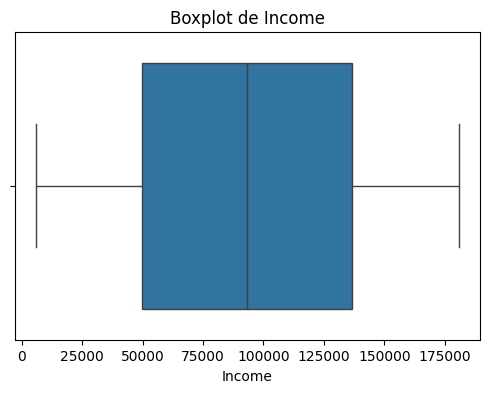

In [68]:
#5. Boxplot de income
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))
sns.boxplot(x=df_customer['Income'])
plt.title('Boxplot de Income')
plt.show()





# 4. Distribución de Kidhome y Teenhome: hogares sin hijos, con hijos.
1. Importo Numpy
2. Conviero las columnas en nº enteros, errores en NaN.
3. Distribución y nulos
4. Total de hijos. Creo variable deribada.


In [69]:
# 2. Convierto en nº enteros, errores.

for c in ['Kidhome','Teenhome']:
    df_customer[c] = pd.to_numeric(df_customer[c], errors='coerce').astype('Int64')


In [70]:
# 3. Distribución básica y nulos

for c in ['Kidhome','Teenhome']:
    print(f"{c}  - nulos:", df_customer[c].isna().sum())
    print(df_customer[c].value_counts(dropna=False).sort_index(), "\n")

Kidhome  - nulos: 0
Kidhome
0    14270
1    14425
2    14475
Name: count, dtype: Int64 

Teenhome  - nulos: 0
Teenhome
0    14402
1    14425
2    14343
Name: count, dtype: Int64 



In [71]:
# 4. Total de hijos
df_customer['Children_total'] = (df_customer['Kidhome'] . fillna(0) +
                                                    df_customer['Teenhome'] . fillna(0)). astype ('int64')


Confirmo la creación de la columna =total children

In [72]:
df_customer. sample(20)


,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,income_outlier_iqr,Children_total
19529,35670,0,0,2012-06-19,2,cfd81a97-8c9b-4e1c-b051-8238d78d38cb,False,0
39384,128276,2,0,2014-05-23,21,98ca0db6-c272-451c-9a17-5dab3c8e7c52,False,2
30360,75826,1,2,2014-11-05,31,c1d6c7a4-3e06-4374-b18e-7819a57f38f2,False,3
23578,16533,1,1,2013-02-07,17,5061e68b-3801-444f-b67a-bf1a00718e18,False,2
13511,178353,1,1,2012-05-08,6,4f1f77c6-fe92-408f-a9e2-682e623ca435,False,2
24343,144257,0,2,2013-09-20,11,bf4406d9-e886-487f-87b3-3ceb7de5052c,False,2
38807,11932,0,1,2014-09-09,22,91385221-a372-48ad-b66c-9fe1ebd3d43e,False,1
12812,19109,2,1,2012-12-18,31,45cb2b26-266d-4536-a060-599da3e254c0,False,3
5695,30056,2,2,2012-09-21,4,3d77bca9-9865-479d-a9c5-8bf689c3a98b,False,4
18354,19339,1,0,2012-09-14,24,2c611e87-989c-45bb-80b9-40e6e6648084,False,1


Realizo un boxplot de la variable Children_total como verificación visual de la distribución y confirmación de que no existen outliers.

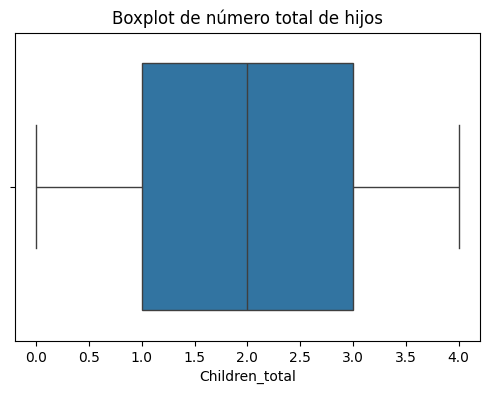

In [73]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_customer['Children_total'])
plt.title("Boxplot de número total de hijos")
plt.show()

# 5. Antiguedad del cliente. Creo columna.
1. Aseguro que la columna es tipo fecha
2. Fecha de referencia hoy
3. Creo columna con años antiguedad
4. Compruebo resultado

In [74]:
df_customer["Dt_Customer"] = pd.to_datetime(df_customer["Dt_Customer"], errors="coerce")   
ref_date = pd.Timestamp.today().normalize()
df_customer["Customer_Tenure_Years"] = ((ref_date - df_customer["Dt_Customer"]).dt.days // 365).astype("Int64")
df_customer[["Dt_Customer", "Customer_Tenure_Years"]].head()



,Dt_Customer,Customer_Tenure_Years
0,2012-04-04,13
1,2012-12-30,12
2,2012-02-02,13
3,2012-12-21,12
4,2012-06-20,13


In [75]:
df_customer. sample(20)

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,income_outlier_iqr,Children_total,Customer_Tenure_Years
37909,21343,1,0,2014-04-25,27,143f90f0-77b3-461e-947c-74685c40dfc3,False,1,11
38543,95157,2,0,2014-01-29,9,39525a2a-e59b-4c80-83f4-f057679d2a07,False,2,11
32749,25645,1,1,2014-05-13,3,bd7589d0-48dd-45b5-b2f0-f7e22b3b0136,False,2,11
2989,169740,2,1,2012-11-17,29,d3126f0a-7990-481a-83c3-e010e84d7f8b,False,3,12
35384,126983,2,0,2014-05-18,23,bd046c1d-05ba-4944-b9b1-4317dcec16d2,False,2,11
11079,117525,0,2,2012-12-28,24,e7383e55-3ff7-47d8-a942-b1247a5a325f,False,2,12
32675,133092,0,0,2014-12-16,22,cf59f3f5-e1e1-4aba-b7fb-073e70827b20,False,0,10
10015,169580,0,2,2012-08-15,11,dcd46f83-5cab-43ec-bc05-b621ef22ba20,False,2,13
4951,101009,1,1,2012-11-13,23,32cb3668-2251-4d30-b62f-dce3837758ec,False,2,12
5585,168338,2,1,2012-07-28,22,b47ffe8e-9342-4b8f-8aac-f4d02b832af3,False,3,13


# 6. Nº Visitas. Visualizo

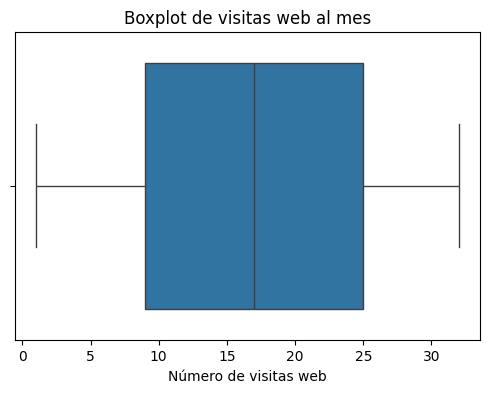

In [76]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_customer["NumWebVisitsMonth"])
plt.title("Boxplot de visitas web al mes")
plt.xlabel("Número de visitas web")
plt.show()

# 2º Dataset. Carga de datos. información

In [77]:
df_bank = pd.read_csv("../Data/Raw/bank-additional.csv")

In [78]:
df_bank. sample(10)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
34932,35076,NaN,technician,SINGLE,NaN,0.0,0.0,1.0,cellular,7,...,-1.8,"92,893","-46,2","1,25","5099,1",no,9-septiembre-2016,25.976,-112.117,d79c83b8-2ccf-4e8e-a5ae-e31d0111e361
42990,28721,36.0,blue-collar,MARRIED,NaN,0.0,1.0,1.0,cellular,90,...,-1.8,"93,075","-47,1",NaN,"5099,1",no,5-agosto-2016,49.310,-93.780,649cf395-b67a-416c-b9ae-3eaf6d3661c5
13205,13302,36.0,technician,MARRIED,professional.course,0.0,1.0,0.0,cellular,167,...,1.4,"93,918","-42,7","4,962","5228,1",no,15-septiembre-2017,35.216,-83.790,9ca31d07-32dd-4fbb-8d17-4a9da7dbe0b8
34593,34737,28.0,blue-collar,SINGLE,basic.9y,NaN,0.0,0.0,cellular,884,...,-1.8,"92,893","-46,2","1,266","5099,1",yes,9-agosto-2019,43.713,-110.572,df8fabe8-36ca-4498-aced-cc3f375ee23d
33092,33236,45.0,admin.,MARRIED,university.degree,0.0,1.0,1.0,cellular,826,...,-1.8,"92,893","-46,2","1,291","5099,1",yes,10-marzo-2016,48.570,-115.192,d5f06339-5ac3-455d-b81a-f9a10ec76bff
1325,1422,51.0,blue-collar,DIVORCED,basic.9y,0.0,0.0,0.0,telephone,119,...,1.1,"93,994","-36,4","4,855",5191,no,23-abril-2019,44.039,-84.405,ae8d96c9-4069-4b3b-8532-e5a2bf27dfed
25228,25350,36.0,management,SINGLE,university.degree,0.0,1.0,0.0,cellular,240,...,-0.1,"93,2",-42,NaN,"5195,8",no,10-agosto-2015,28.710,-66.969,ef8efdee-fc4f-4584-bc39-6068480fb9f8
8567,8664,30.0,services,SINGLE,high.school,0.0,0.0,0.0,telephone,245,...,1.4,"94,465","-41,8","4,864","5228,1",no,27-octubre-2016,25.680,-94.988,a14660f1-52fe-468f-8ec6-1f64b2b72ed3
10460,10557,25.0,blue-collar,MARRIED,basic.9y,NaN,0.0,0.0,telephone,71,...,1.4,"94,465","-41,8","4,961","5228,1",no,6-agosto-2015,37.679,-82.040,f5a4b1e1-fc1f-4597-9e1e-a2b524448c34
29094,29238,33.0,technician,SINGLE,high.school,0.0,0.0,0.0,cellular,124,...,-1.8,"93,075","-47,1",NaN,"5099,1",no,2-septiembre-2019,37.416,-92.265,29a29fa5-e0e2-4801-a6e8-92f1525abf95


In [79]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 
 17  euribor3m       33744 non-null 

## Visualizo toda la información, nulos y tipo de dato

In [80]:
resumen = pd.DataFrame({
    "Non-Null Count": df_bank.notna().sum(),
    "Null Count": df_bank.isna().sum(),
    "Dtype": df_bank.dtypes
})
print(resumen)


                Non-Null Count  Null Count    Dtype
Unnamed: 0               43000           0    int64
age                      37880        5120  float64
job                      42655         345   object
marital                  42915          85   object
education                41193        1807   object
default                  34019        8981  float64
housing                  41974        1026  float64
loan                     41974        1026  float64
contact                  43000           0   object
duration                 43000           0    int64
campaign                 43000           0    int64
pdays                    43000           0    int64
previous                 43000           0    int64
poutcome                 43000           0   object
emp.var.rate             43000           0  float64
cons.price.idx           42529         471   object
cons.conf.idx            43000           0   object
euribor3m                33744        9256   object
nr.employed 

# Columnas e información ( Hay datos incompletos)

0. Unnamed:  se puede eliminar

1. age (float64): edad de la persona.

2. job (object): profesión.

3. marital (object): estado civil.

4. education (object): educación.

5. default (float64): si el cliente tiene crédito con impago (posibles nulos).

6. housing (float64): si tiene préstamo hipotecario (posibles nulos).

7. loan (float64): si tiene préstamo personal (posibles nulos).

8. contact (object): tipo de contacto.

9. duration (int64): duración de la llamada/contacto en segundos. Covierto en minutos

10. campaign (int64):  número de veces que se ha contactado al cliente. No transformo, esta correcta.

11. pdays (int64): días desde el último contacto (999 significa que nunca se contactó). Transformo en "contacto" o "no contacto".

12. previous (int64): número de contactos anteriores. Dejo como esta.

13. poutcome (object): resultado de campaña de marketing anterior. Traduzco a español, 3 valores.

14. emp.var.rate (float64): indicador económico (tasa de variación del empleo).

15. cons.price.idx (object): indice de precios del consumidor. Reemplazo nulos por la madiana. Nulos 1.1%.

16. cons.conf.idx (object): indice de confianza del consumidor. Con los valores negativos transformo en "confianza media", "baja confianza" y "alta confianza"

17. euribor3m (object): tasa de interés euríbor a 3 meses. Cuento nulos = 21.53%. Reemplazo nulos por "euribor desconocido". Creo categorías; euribor bajo, euribor medio, euribor alto y ya creada euribor desconocido.

18. nr.employed (object): número de empleados (indicador económico). La dejamos como esta, no hay nulos.

19. month (object): mes del último contacto de la campaña.

20. day_of_week (object): día de la semana del último contacto.

21. longitude (float64): localización geográfica.

22. id (object): identificador único del cliente.

23. y (object): variable objetivo (si el cliente contrató o no el producto/servicio).


# * Pasos limpieza y transformación (cuando este detallarlo bien)



Eliminar Unnamed: 0.

Revisar valores faltantes (default, housing, loan, marital, job).

Analizar la variable objetivo y (cuántos clientes aceptaron vs rechazaron)

Distribución de edad: ver segmentos más contactados.

Cruzar duración de llamadas (duration) con éxito (y).

Revisar variables económicas (euribor3m, emp.var.rate): ómo influyen en la respuesta.

Outliers en duración de llamadas y pdays.






# 1. Eliminamos columna Unnamed

In [81]:
df_bank = df_bank.drop(columns=["Unnamed: 0"])

# Comprobar columnas resultantes
print(df_bank.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'latitude', 'longitude', 'id_'],
      dtype='object')


# 2. Columna age, tenemos 12% aprox. de nulos. 
1. Visualizo: edades entre 30 y 50 años, mediana aprox. 40 años (38), de 18 a 20 años los más jóvenes, mayores apox 70 años. Hay clientes con edades entre los 70 y 100 años. 
2. Reemplazo nulos por la mediana

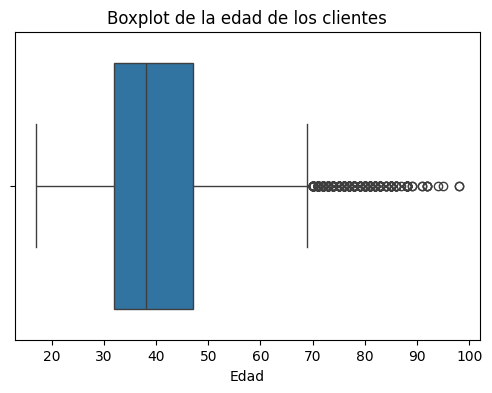

In [82]:
# Visualizo
plt.figure(figsize=(6,4))
sns.boxplot(x=df_bank["age"].dropna())
plt.title("Boxplot de la edad de los clientes")
plt.xlabel("Edad")
plt.show()

In [83]:
# Reemplazo nulos por mediana 38 años
# Calcular la mediana de la edad (ignorando nulos)
mediana_age = df_bank["age"].median()

# Rellenar los nulos con la mediana
df_bank["age"] = df_bank["age"].fillna(mediana_age)

# Compruebo que ya no hay nulos en la columna age
print("Nulos en edad después de imputar:", df_bank["age"].isna().sum())
print("Mediana usada:", mediana_age)


Nulos en edad después de imputar: 0
Mediana usada: 38.0


In [84]:
# visulizo la información de nuevo
resumen = pd.DataFrame({
    "Non-Null Count": df_bank.notna().sum(),
    "Null Count": df_bank.isna().sum(),
    "Dtype": df_bank.dtypes
})
print(resumen)


                Non-Null Count  Null Count    Dtype
age                      43000           0  float64
job                      42655         345   object
marital                  42915          85   object
education                41193        1807   object
default                  34019        8981  float64
housing                  41974        1026  float64
loan                     41974        1026  float64
contact                  43000           0   object
duration                 43000           0    int64
campaign                 43000           0    int64
pdays                    43000           0    int64
previous                 43000           0    int64
poutcome                 43000           0   object
emp.var.rate             43000           0  float64
cons.price.idx           42529         471   object
cons.conf.idx            43000           0   object
euribor3m                33744        9256   object
nr.employed              43000           0   object
y           

# 3. Columna job. Reemplazo nulos por "desconocido".  Convierto a español.

In [85]:
df_bank['job'] = df_bank['job'].fillna('desconocido')

# Traduzco a español
df_bank['job'] = df_bank['job'].replace({
    'housemaid': 'empleada hogar',
    'services': 'servicios',
    'admin.': 'administrativo',
    'blue-collar': 'obrero',
    'technician': 'técnico',
    'retired': 'jubilado',
    'management': 'directivo',
    'unemployed': 'desempleado',
    'self-employed': 'autónomo',
    'entrepreneur': 'emprendedor',
    'student': 'estudiante',
    'desconocido': 'desconocido'
})


#visualizo categorías únicas

print(df_bank['job'].unique())

['empleada hogar' 'servicios' 'administrativo' 'obrero' 'técnico'
 'jubilado' 'directivo' 'desempleado' 'autónomo' 'desconocido'
 'emprendedor' 'estudiante']


# 4. Columna Marital. Reemplazo nulos por "desconocido". Convierto todo en minúsculas y quito espacios

In [86]:
df_bank['marital'] = df_bank['marital'].fillna('desconocido').replace('', 'desconocido')

#visualizo categorías únicas

print(df_bank['marital'].unique())

# Covertimos en minúsculas y quitamos espacios al principio

df_bank['marital'] = df_bank['marital'].str.strip().str.lower()

# Traduzco a español
df_bank['marital'] = df_bank['marital'].replace({
    'married': 'casado',
    'single': 'soltero',
    'divorced': 'divorciado',
    'desconocido': 'desconocido'
})


# vuelvo a visualizar
print(df_bank['marital'].unique())



['MARRIED' 'SINGLE' 'DIVORCED' 'desconocido']


['casado' 'soltero' 'divorciado' 'desconocido']


# 5. Columna Education. Cambio nulos por "desconocido". Convertimos en minúsculas y quito espacios. Agrupo categorías

In [87]:
df_bank['education'] = df_bank['education'].str.strip().str.lower()

#cambio nulos por desconocido
df_bank['education'] = df_bank['education'].replace('', 'desconocido').fillna('desconocido')



#agrupo categorías

df_bank['education'] = df_bank['education'].replace({
    'basic.4y': 'basico',
    'basic.6y': 'basico',
    'basic.9y': 'basico',
    'high.school': 'secundaria',
    'university.degree': 'universidad',
    'professional.course': 'profesional',
    'illiterate': 'sin_estudios',
    'desconocido': 'desconocido'
})
#visualizo. Confirmo todo lo hecho anteriormente

print(df_bank['education'].unique())
df_bank.info()


['basico' 'secundaria' 'profesional' 'desconocido' 'universidad'
 'sin_estudios']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43000 non-null  float64
 1   job             43000 non-null  object 
 2   marital         43000 non-null  object 
 3   education       43000 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 

# 6. Columna default. Cambio los nulos por "desconocido". Convierto valores en string, elimino espacios y todo minuscula. Convierto en si, no o desconocido. 

In [88]:
# Reemplazamos nulos por desconocido
df_bank['default'] = df_bank['default'].fillna('desconocido')

# Convierto valores en string, eliminamos espacios en blanco y en minúscula

df_bank['default'] = df_bank['default'].astype(str).str.strip().str.lower()

# Convierto a objeto

df_bank['default'] = df_bank['default'].replace({
    '0.0': 'no',
    '1.0': 'sí',
    'desconocido': 'desconocido'
})

#reviso resultado
print(df_bank['default'].unique())
df_bank.info()

['no' 'desconocido' 'sí']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43000 non-null  float64
 1   job             43000 non-null  object 
 2   marital         43000 non-null  object 
 3   education       43000 non-null  object 
 4   default         43000 non-null  object 
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.em

# 7. Columna housing. Cambio nulos por "desconocido". Convierto valores en string, elimino espacios y minuscula. Convierto en si, no o desconocido.

In [89]:
# Cambio nulos por desconocido

df_bank['housing'] = df_bank['housing'].fillna('desconocido')

# Convierto valores en string, elimino espacios y minuscula

df_bank['housing'] = df_bank['housing'].astype(str).str.strip().str.lower()

# Convierto a objeto

df_bank['housing'] = df_bank['housing'].replace({
    '0.0': 'no',
    '1.0': 'sí',
    'desconocido': 'desconocido'
})
# visualizo

print(df_bank['housing'].unique())
df_bank.info()



['no' 'sí' 'desconocido']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43000 non-null  float64
 1   job             43000 non-null  object 
 2   marital         43000 non-null  object 
 3   education       43000 non-null  object 
 4   default         43000 non-null  object 
 5   housing         43000 non-null  object 
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.em

# 8. Columna loan. Cambio nulos por "desconocido". Convierto valores en string, elimino espacios y minuscula. Convierto en si, no o desconocido.

In [90]:
df_bank['loan'] = df_bank['loan'].fillna('desconocido')

# Convierto valores en string, elimino espacios y minuscula

df_bank['loan'] = df_bank['loan'].astype(str).str.strip().str.lower()

# Convierto a objeto

df_bank['loan'] = df_bank['loan'].replace({
    '0.0': 'no',
    '1.0': 'sí',
    'desconocido': 'desconocido'
})
# visualizo

print(df_bank['loan'].unique())
df_bank.info()

['no' 'sí' 'desconocido']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43000 non-null  float64
 1   job             43000 non-null  object 
 2   marital         43000 non-null  object 
 3   education       43000 non-null  object 
 4   default         43000 non-null  object 
 5   housing         43000 non-null  object 
 6   loan            43000 non-null  object 
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.em

# 9. Columna contact, traduzco a español. No hay nulos.

In [91]:
df_bank['contact'] = df_bank['contact'].replace({
    'cellular': 'móvil',
    'telephone': 'teléfono fijo'
})

print(df_bank['contact'].unique())

['teléfono fijo' 'móvil']


# 10. Columna duration lo convierto en minutos.

In [92]:
# Convierto de segundos a minutos
df_bank['duration'] = (df_bank['duration'] / 60).round(2)

print(df_bank['duration'].head())

0    4.35
1    2.48
2    3.77
3    2.52
4    5.12
Name: duration, dtype: float64


# 11. Columna pdays, tenemos valores del 1 al 27 que es con contacto,  0 y 999 que entiendo que es sin contacto. Transformo columna en datos contacto o no contacto. 

In [93]:
# Transformamos la columna pdays en 'contacto' / 'no_contacto'
df_bank['pdays'] = df_bank['pdays'].apply(lambda x: 'no_contacto' if x in [0, 999] else 'contacto')

# Revisamos resultado
print(df_bank['pdays'].unique())
print(df_bank['pdays'].value_counts())


['no_contacto' 'contacto']
pdays
no_contacto    41427
contacto        1573
Name: count, dtype: int64


In [94]:
#Visualizo 
df_bank.sample(10)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
26361,59.0,jubilado,casado,profesional,no,no,no,móvil,1.95,1,...,-0.1,"93,2",-42,"4,076","5195,8",no,11-mayo-2017,48.782,-96.164,76688351-6698-4677-bc68-18793724bd35
30826,37.0,directivo,divorciado,desconocido,no,sí,no,móvil,2.45,2,...,-1.8,"92,893","-46,2","1,344","5099,1",no,10-marzo-2017,47.918,-85.272,7dc44bad-1ce0-44c6-b3b7-f4721d7f3384
23681,41.0,directivo,casado,universidad,no,sí,no,móvil,3.22,1,...,1.4,"93,444","-36,1","4,963","5228,1",no,6-octubre-2018,40.966,-80.496,1512d101-73e2-4bf5-b3ca-fa062af9ff76
556,46.0,obrero,casado,basico,no,sí,no,teléfono fijo,2.45,2,...,1.1,"93,994","-36,4","4,857",5191,no,16-diciembre-2019,39.534,-96.845,1f476712-1824-4be7-9ad7-5742c953f30e
25090,42.0,técnico,casado,basico,no,no,no,móvil,2.77,2,...,-0.1,"93,2",-42,"4,153","5195,8",no,16-septiembre-2019,45.205,-112.960,8e767203-feb9-4208-89cf-6dacbbf8e356
7965,38.0,obrero,casado,secundaria,desconocido,no,no,teléfono fijo,12.95,4,...,1.4,"94,465","-41,8","4,865","5228,1",yes,5-julio-2016,25.763,-86.170,a3be43df-e403-4756-ba8f-b08d6c556abb
37035,35.0,administrativo,soltero,universidad,no,no,no,móvil,4.17,1,...,-2.9,"92,201","-31,4","0,883","5076,2",no,15-marzo-2019,25.592,-88.056,53af16ae-4dec-4bbc-9b9f-0e7322d7c859
38119,71.0,jubilado,casado,basico,no,no,no,móvil,3.95,1,...,-3.4,"92,431","-26,9","0,742","5017,5",no,8-julio-2015,44.298,-67.296,f6f9e78a-0b44-4841-af1f-8cc977d81fd3
37711,38.0,administrativo,casado,universidad,no,sí,no,móvil,4.45,1,...,-2.9,"92,201","-31,4",NaN,"5076,2",yes,10-octubre-2017,26.784,-76.584,0dfbd71b-bf0e-498f-8e9a-a5851391d580
34013,32.0,administrativo,soltero,universidad,no,sí,sí,móvil,1.40,2,...,-1.8,"92,893","-46,2","1,281","5099,1",no,19-enero-2016,47.569,-108.239,62bc5428-5b48-4891-ba78-ace7e6cfd607


# 12. Columna poutcome, tenemos 3 valores. Traduzco.

In [95]:
# Normalizo a minusculas
df_bank['poutcome'] = df_bank['poutcome'].str.strip().str.lower()

df_bank['poutcome'] = df_bank['poutcome'].replace({
    'success': 'éxito',
    'failure': 'fracaso',
    'nonexistent': 'inexistente'
})

# Reviso resultado
print(df_bank['poutcome'].unique())
print(df_bank['poutcome'].value_counts())


['inexistente' 'fracaso' 'éxito']
poutcome
inexistente    37103
fracaso         4461
éxito           1436
Name: count, dtype: int64


# 13. Columna emp. var. rate, lo transformo en categorías de tendencia.

In [96]:
# Transformo
df_bank['emp.var.rate'] = df_bank['emp.var.rate'].apply(
    lambda x: 'caída empleo' if x < 0 else 'crecimiento empleo'
)


#Visualizo
df_bank.sample(10)


,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
23444,32.0,administrativo,soltero,universidad,no,sí,no,móvil,0.20,15,...,crecimiento empleo,"93,444","-36,1","4,962","5228,1",no,2-julio-2016,43.069,-79.351,a2a4e8ac-fdf0-4530-87a6-6215b93c2636
27302,37.0,emprendedor,casado,universidad,no,sí,no,teléfono fijo,0.75,2,...,caída empleo,"93,2",-42,"4,021","5195,8",no,26-noviembre-2015,31.290,-93.087,17ebe06c-ea3c-46c5-abf3-98aa1330f4b4
41153,48.0,administrativo,casado,secundaria,no,sí,sí,teléfono fijo,4.85,1,...,caída empleo,"92,756","-45,9",NaN,"5176,3",no,7-septiembre-2017,40.102,-117.455,a7bb0bed-1012-4ef4-b8a0-fee77175c04b
38129,34.0,directivo,casado,universidad,no,no,no,teléfono fijo,4.83,2,...,caída empleo,"92,431","-26,9","0,742","5017,5",yes,20-julio-2016,25.548,-94.834,ff029b27-95b2-46a1-ac75-a89572806159
11211,38.0,administrativo,casado,universidad,no,no,no,teléfono fijo,3.37,1,...,crecimiento empleo,"94,465","-41,8","4,961","5228,1",no,4-junio-2018,32.484,-105.095,7186d929-ba56-43ab-b993-68e06a500bd3
2838,26.0,emprendedor,soltero,secundaria,no,no,no,teléfono fijo,5.52,2,...,crecimiento empleo,"93,994","-36,4","4,859",5191,no,28-febrero-2015,37.471,-107.367,66d2e944-b121-4ae8-978d-267e81500565
23587,60.0,administrativo,casado,basico,no,no,no,móvil,2.70,1,...,crecimiento empleo,"93,444","-36,1","4,962","5228,1",no,3-noviembre-2016,46.341,-99.666,081f22d4-7559-46fb-be11-06b8f84dde72
7377,24.0,técnico,soltero,profesional,desconocido,sí,sí,teléfono fijo,7.45,1,...,crecimiento empleo,"93,994","-36,4",NaN,5191,no,19-octubre-2019,44.266,-120.073,4eed099a-34c8-4205-8ef1-e01502b43434
11490,53.0,obrero,casado,basico,desconocido,sí,sí,teléfono fijo,0.27,20,...,crecimiento empleo,"94,465","-41,8",NaN,"5228,1",no,22-marzo-2016,29.632,-70.563,a198ef0d-2ac2-4ebf-bea3-1e0d81e08a71
28363,42.0,autónomo,casado,universidad,no,sí,no,móvil,3.60,1,...,caída empleo,"93,075","-47,1","1,423","5099,1",yes,11-febrero-2019,36.486,-91.844,c182ecaf-848a-4ae1-bc06-9dd98dbf65a2


# 14. Columna cons.price.idx , primero cuento cada valor (nulos). Como nos da el 1.1% de nulos los reemplazo por la mediana

In [97]:
# Contar cuántos valores vacíos hay

print(df_bank['cons.price.idx'].value_counts(dropna=False))


cons.price.idx
93,994    7938
93,918    6937
92,893    5985
93,444    5349
94,465    4522
93,2      3731
93,075    2552
92,201     803
92,963     742
NaN        471
92,431     471
92,649     375
94,215     320
94,199     316
92,843     298
92,379     274
93,369     271
94,027     242
94,055     236
93,876     224
94,601     212
92,469     184
92,713     179
93,749     179
94,767     130
93,798      48
92,756      11
Name: count, dtype: int64


In [98]:
# Reemplazo comas por puntos y convierto a numérico
df_bank['cons.price.idx'] = df_bank['cons.price.idx'].astype(str).str.replace(',', '.')
df_bank['cons.price.idx'] = pd.to_numeric(df_bank['cons.price.idx'], errors='coerce')


# Calcular mediana
mediana_precio = df_bank['cons.price.idx'].median()

# Rellenar vacíos con la mediana
df_bank['cons.price.idx'] = df_bank['cons.price.idx'].fillna(mediana_precio)

# Revisar que ya no haya vacíos
print(df_bank['cons.price.idx'].isna().sum())


# verifico

# 1. Confirmo que ya no quedan vacíos
print("Nulos en cons.price.idx:", df_bank['cons.price.idx'].isna().sum())

# 2. Estadísticas descriptivas
print("\nEstadísticas de cons.price.idx:")
print(df_bank['cons.price.idx'].describe())

# 3. Valores únicos más frecuentes
print("\nValores más frecuentes:")
print(df_bank['cons.price.idx'].value_counts().head(10))



0
Nulos en cons.price.idx: 0

Estadísticas de cons.price.idx:
count    43000.000000
mean        93.576134
std          0.576652
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

Valores más frecuentes:
cons.price.idx
93.994    7938
93.918    6937
92.893    5985
93.444    5349
94.465    4522
93.200    3731
93.075    2552
92.201     803
92.963     742
93.749     650
Name: count, dtype: int64


# 15. Columna cons.conf.idx, con los varoles - transformo en "confianza media", "baja confianza" y "alta confianza".

In [99]:
# Aseguro que los valores son numéricos (convertimos coma a punto si hace falta)
df_bank['cons.conf.idx'] = df_bank['cons.conf.idx'].astype(str).str.replace(',', '.')
df_bank['cons.conf.idx'] = pd.to_numeric(df_bank['cons.conf.idx'], errors='coerce')

# Transformo directamente en categorías
df_bank['cons.conf.idx'] = pd.qcut(df_bank['cons.conf.idx'], 
                                   q=3, 
                                   labels=['baja confianza', 'confianza media', 'alta confianza'])

# Reviso
print(df_bank['cons.conf.idx'].unique())
print(df_bank['cons.conf.idx'].value_counts(normalize=True) * 100)


['confianza media', 'baja confianza', 'alta confianza']
Categories (3, object): ['baja confianza' < 'confianza media' < 'alta confianza']
cons.conf.idx
confianza media    43.072093
baja confianza     37.904651
alta confianza     19.023256
Name: proportion, dtype: float64


# 16. Columna Euribor3m.  Cuento nulos = 21.53%. Reemplazo nulos por "euribor desconocido". Creo categorías; euribor bajo, euribor medio, euribor alto y ya creada euribor desconocido.

In [100]:
# Cuento nulos
nulos_euribor = df_bank['euribor3m'].isna().sum()
total_registros = len(df_bank)

print(f"Nulos en euribor3m: {nulos_euribor}")
print(f"Total de registros: {total_registros}")
print(f"Porcentaje de nulos: {nulos_euribor / total_registros * 100:.2f}%")

Nulos en euribor3m: 9256
Total de registros: 43000
Porcentaje de nulos: 21.53%


In [101]:
# Reemplazo nulos por "euribor desconocido"
df_bank['euribor3m'] = df_bank['euribor3m'].fillna('euribor desconocido')

# Reviso resultado
print(df_bank['euribor3m'].value_counts(dropna=False))


euribor3m
euribor desconocido    9256
4,857                  2287
4,962                  2124
4,963                  2019
4,961                  1594
                       ... 
5,045                     1
4,921                     1
0,956                     1
0,894                     1
0,953                     1
Name: count, Length: 310, dtype: int64


In [102]:
# Separo los nulos ya marcados como 'euribor desconocido'
mask_numericos = df_bank['euribor3m'] != 'euribor desconocido'

# Convierto los valores numéricos a float corrigiendo la coma decimal
df_bank.loc[mask_numericos, 'euribor3m'] = (
    df_bank.loc[mask_numericos, 'euribor3m']
    .astype(str)            # me aseguro de que son strings
    .str.replace(',', '.')  # cambio coma por punto
    .astype(float)          # convierto a float
)

# Aplico qcut a esos valores numéricos
df_bank.loc[mask_numericos, 'euribor3m'] = pd.qcut(
    df_bank.loc[mask_numericos, 'euribor3m'],
    q=3,
    labels=['euribor bajo', 'euribor medio', 'euribor alto']
)

# Reviso
print(df_bank['euribor3m'].unique())
print(df_bank['euribor3m'].value_counts())


['euribor medio' 'euribor desconocido' 'euribor alto' 'euribor bajo']
euribor3m
euribor bajo           11671
euribor alto           11157
euribor medio          10916
euribor desconocido     9256
Name: count, dtype: int64


# 17. Columna y. No hay nulos. Traduzo

In [103]:
# Traduzco 
df_bank['y'] = df_bank['y'].map({'yes': 'Sí', 'no': 'No'})

# Verifico
print(df_bank['y'].value_counts())


y
No    38156
Sí     4844
Name: count, dtype: int64


# 18. Columna date. Hay nulos, un 0,58%. Dado el bajo porcentaje y para no distorsionar el análisis descriptivo posterior, decidí eliminarlos del dataset. Doy formato a fecha. Creo columnas: año y mes. Creo columna con nombre de mes (string) y la convierto en categórica ordenada

In [104]:
# Veo cuantos nulos
df_bank['date'].isna().sum(), df_bank['date'].isna().mean() * 100

(np.int64(248), np.float64(0.5767441860465117))

In [105]:

# Normalizo vacíos para que cuenten como nulos
df_bank['date'] = df_bank['date'].replace(
    to_replace=[r'^\s*$', 'NA', 'NaN', 'nan', 'NULL', 'None', 'NaT'],
    value=pd.NA,
    regex=True
)

# Conteo antes
antes_filas = len(df_bank)
n_nulos = df_bank['date'].isna().sum()
print(f"Nulos en 'date' antes de eliminar: {n_nulos}")

# Elimino filas con date nulo
df_bank = df_bank.dropna(subset=['date']).reset_index(drop=True)

# Verificación
despues_filas = len(df_bank)
eliminadas = antes_filas - despues_filas
print(f"Filas eliminadas: {eliminadas}")
print(f"Nulos restantes en 'date': {df_bank['date'].isna().sum()}")
print(f"Shape actual: {df_bank.shape}")


Nulos en 'date' antes de eliminar: 248
Filas eliminadas: 248
Nulos restantes en 'date': 0
Shape actual: (42752, 23)


In [106]:
# Normalizo y parseo 'date'  (formato día/mes/año con meses en español)
s = (df_bank['date'].astype(str)
                  .str.lower()
                  .str.replace('\u00a0', ' ', regex=False)      # NBSP → espacio normal
                  .str.replace(r'\s*-\s*', '-', regex=True)      # " - " → "-"
                  .str.replace(r'\s*/\s*', '/', regex=True)      # " / " → "/"
                  .str.strip())

meses = {
    'enero':'1','febrero':'2','marzo':'3','abril':'4','mayo':'5','junio':'6',
    'julio':'7','agosto':'8','septiembre':'9','setiembre':'9',
    'octubre':'10','noviembre':'11','diciembre':'12'
}
for m, n in meses.items():
    s = s.replace(fr'-{m}-', f'-{n}-', regex=True)
    s = s.replace(fr'/{m}/', f'/{n}/', regex=True)

df_bank['date'] = pd.to_datetime(s, dayfirst=True, errors='coerce')

# Chequeo rápido
print(df_bank['date'].dtype, " | NaT:", df_bank['date'].isna().sum())


datetime64[ns]  | NaT: 0


In [107]:
#Creo columnas, año y mes.
df_bank['year']  = df_bank['date'].dt.year
df_bank['month'] = df_bank['date'].dt.month            # 1–12



In [108]:
# Creo columna con nombre de mes (string) y la convierto en categórica ordenada
meses = {1:'enero',2:'febrero',3:'marzo',4:'abril',5:'mayo',6:'junio',
         7:'julio',8:'agosto',9:'septiembre',10:'octubre',11:'noviembre',12:'diciembre'}
orden = list(meses.values())
df_bank['month_name'] = df_bank['month'].map(meses)
df_bank['month_name'] = pd.Categorical(df_bank['month_name'], categories=orden, ordered=True)


# 19. Columnas latitude y longitude. Aseguro tipo numérico, chequeo. 

In [ ]:
# Aseguro tipo numérico
df_bank['latitude']  = pd.to_numeric(df_bank['latitude'], errors='coerce')
df_bank['longitude'] = pd.to_numeric(df_bank['longitude'], errors='coerce')

# Chequeos de rango geográfico
print("Lat fuera de [-90,90]:",  (~df_bank['latitude'].between(-90, 90)).sum())
print("Lon fuera de [-180,180]:", (~df_bank['longitude'].between(-180,180)).sum())


Lat fuera de [-90,90]: 0
Lon fuera de [-180,180]: 0


In [ ]:
# Busco ciudad/país para cada par (lat, lon)
coords = list(zip(df_bank['latitude'].values, df_bank['longitude'].values))
matches = rg.search(coords)   # devuelve lista de dicts: name, admin1, admin2, cc, lat, lon

# Vuelco resultados al DataFrame
df_bank['city']         = [m['name']   for m in matches]   # ciudad más cercana
df_bank['region']       = [m['admin1'] for m in matches]   # estado/provincia
df_bank['country_code'] = [m['cc']     for m in matches]   # código ISO-2

# Código ISO-2 : nombre de país
code2name = {c.alpha_2: c.name for c in pycountry.countries}
df_bank['country'] = df_bank['country_code'].map(code2name).fillna(df_bank['country_code'])

# Vistazo rápido
df_bank[['latitude','longitude','city','region','country']].head()

Loading formatted geocoded file...


,latitude,longitude,city,region,country
0,41.495,-71.233,Newport East,Rhode Island,United States
1,34.601,-83.923,Dahlonega,Georgia,United States
2,34.939,-94.847,Wister,Oklahoma,United States
3,49.041,-70.308,Saguenay,Quebec,Canada
4,38.033,-104.463,Pueblo,Colorado,United States


In [112]:
df_bank.sample(40)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,latitude,longitude,id_,year,month,month_name,city,region,country_code,country
23755,41.0,administrativo,casado,universidad,no,sí,no,teléfono fijo,1.05,9,...,27.028,-113.966,fd6e84b7-60ea-4b20-8156-71042a7ddc6a,2018,8,agosto,Bahia Asuncion,Baja California Sur,MX,Mexico
6385,56.0,técnico,casado,basico,no,sí,no,teléfono fijo,0.87,2,...,43.350,-100.845,47021c37-6c7e-42c4-88ac-900f522fae24,2018,4,abril,Rosebud,South Dakota,US,United States
25805,38.0,administrativo,casado,universidad,no,sí,no,móvil,3.48,2,...,42.952,-96.337,da578ae8-5e45-417f-aa41-583f27fcc172,2015,4,abril,Hawarden,Iowa,US,United States
23106,57.0,obrero,casado,basico,desconocido,sí,no,móvil,1.82,1,...,45.447,-103.318,b6bf19ed-e603-4a8d-8fbe-24060bb912c4,2015,3,marzo,Buffalo,South Dakota,US,United States
1748,56.0,administrativo,casado,universidad,no,no,no,teléfono fijo,24.35,2,...,28.484,-93.502,ddeaf452-dbdf-45ab-ba7c-d442fef1ac08,2017,12,diciembre,Cameron,Louisiana,US,United States
25696,38.0,obrero,soltero,basico,no,sí,no,móvil,5.47,1,...,46.391,-81.010,f6df9a80-1a6f-4160-b56f-e6a9858668ff,2015,6,junio,Greater Sudbury,Ontario,CA,Canada
6990,49.0,servicios,casado,secundaria,desconocido,sí,no,teléfono fijo,2.77,1,...,36.277,-110.899,2b514fef-990b-4e14-beae-b27be4d77dc1,2016,1,enero,Kaibito,Arizona,US,United States
29512,37.0,servicios,casado,secundaria,no,no,no,móvil,16.83,3,...,32.293,-113.129,9c1d160a-7b87-4bad-ad3e-3cf6ee1f3742,2016,5,mayo,Ajo,Arizona,US,United States
6375,38.0,administrativo,soltero,secundaria,no,no,no,teléfono fijo,2.67,1,...,43.414,-71.825,00c08d6e-eed2-44c8-b25a-d57326151e44,2016,5,mayo,Andover,New Hampshire,US,United States
39504,62.0,jubilado,divorciado,secundaria,no,sí,no,móvil,3.35,4,...,31.563,-85.176,622c3eef-bfc3-421d-8958-019d8aa9e8e5,2015,3,marzo,Abbeville,Alabama,US,United States
